## Exploratory Data Analysis

Importing the libraries and the dataset.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

notebook = 'EDA.ipnyb'
path = os.path.dirname(os.path.abspath(notebook))+'/data/'
train_path = path+'census_income_learn.csv'
test_path = path+'census_income_test.csv'

#columns names for mapping according to the metadata file
column_names =['age',
               'class of worker',
               'detailed industry recode',
               'detailed occupation recode',
               'education',
               'wage per hour',
               'enrolled in edu inst last wk',
               'marital stat',
               'major industry code',
               'major occupation code',
               'race',
               'hispanic origin',
               'sex',
               'member of a labor union',
               'reason for unemployment',
               'full or part time employment stat',
               'capital gains',
               'capital losses',
               'dividends from stocks',
               'tax filer status',
               'region of previous residence',
               'state of previous residence',
               'detailed household and family stat',
               'detailed household summary in household',
               'instance weight',
               'migration code-change in msa',
               'migration code-change in reg',
               'migration code-move within reg',
               'live in this house 1 year ago',
               'migration prev res in sunbelt',
               'num persons worked for employer',
               'family members under 18',
               'country of birth father',
               'country of birth mother',
               'country of birth self',
               'citizenship',
               'own business or self employed',
               'fill inc questionnaire for veterans admin',
               'veterans benefits',
               'weeks worked in year',
              'year',
              'target']
               

train = pd.read_csv(train_path,names=column_names)

## Overview of the dataset

In [2]:
train.shape

(199523, 42)

In [3]:
#setting the column display to the dataset number of columns
pd.set_option("max_columns", train.shape[1])

In [4]:
train.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enrolled in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


Quoting the metadata:

"The instance weight indicates the number of people in the population
that each record represents due to stratified sampling.
To do real analysis and derive conclusions, this field must be used.
This attribute should *not* be used in the classifiers, so it is set to "ignore" in this file."

As such we are going to drop this column for now and if needed, we'll revert it.

In [5]:
train.drop(columns=['instance weight'], inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   age                                        199523 non-null  int64 
 1   class of worker                            199523 non-null  object
 2   detailed industry recode                   199523 non-null  int64 
 3   detailed occupation recode                 199523 non-null  int64 
 4   education                                  199523 non-null  object
 5   wage per hour                              199523 non-null  int64 
 6   enrolled in edu inst last wk               199523 non-null  object
 7   marital stat                               199523 non-null  object
 8   major industry code                        199523 non-null  object
 9   major occupation code                      199523 non-null  object
 10  race                

In [7]:
train.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


In [8]:
train.describe(include=[object])

,class of worker,education,enrolled in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,fill inc questionnaire for veterans admin,target
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,9,17,3,7,24,15,5,10,2,3,6,8,6,6,51,38,8,10,9,10,3,4,5,43,43,43,5,3,2
top,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Not in universe,Householder,Householder,?,?,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,- 50000.
freq,100245,48407,186943,86485,100684,100684,167365,171907,103984,180459,193453,123769,75094,183750,183750,53248,75475,99696,99696,99696,101212,99696,144232,159163,160479,176989,176992,197539,187141


### Duplicate entries

The metadata already indicates potentialy data conflicts with duplicate data.
So let's start by checking how duplicate entries there are.

In [9]:
len(train)-len(train.drop_duplicates())

46627

According to the documentation the universe is:
"The universe is the civilian noninstitutional
population of the United States living in housing
units and members of the Armed Forces living in
civilian housing units on a military base or in a
household not on a military base."

Which means each row is an actual person. 
So let's think for a second here:

What are the odds of two people being born in the same place, do the exact same job, earn the exact same amount, and so on?

We need to investigate this to see if these the two people with the same characteristics are an actual representation of the population or an input error.

The documentation also states: "A probability
sample is used in selecting housing units." With this in mind we are going to investigate this question.

In [10]:
#isolation the index with the duplicate entries
index = np.setdiff1d(train.index, train.drop_duplicates().index)
index

array([   121,    226,    243, ..., 199506, 199512, 199521])

In [11]:
train.loc[index].education.unique()

array([' Children', ' 7th and 8th grade', ' 9th grade',
       ' High school graduate', ' 10th grade', ' 11th grade',
       ' Bachelors degree(BA AB BS)', ' Some college but no degree',
       ' Associates degree-occup /vocational', ' 5th or 6th grade',
       ' 1st 2nd 3rd or 4th grade', ' 12th grade no diploma',
       ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' Associates degree-academic program', ' Less than 1st grade',
       ' Prof school degree (MD DDS DVM LLB JD)',
       ' Doctorate degree(PhD EdD)'], dtype=object)

Taken from a kaggle [discussion](https://www.kaggle.com/questions-and-answers/44144):

"The duplicates do provide weightage for the class they belong to. If you remove the duplicates, naturally the weightage of that class comes down and effectively the model will be different.
If the duplicates come as part of a real world observation, we should just leave them and build the model than trying to remove."

So the main goal of this step is to filter which duplicates are a real world observation or not.
To try to answer that we are going to look more closely into the continuous variables:
* age, 
* wage per hour, 
* capital gains, 
* capital losses, 
* dividends from stocks, 
* weeks work in year

Since these are less likely to actually be equal as they are continuous.

In [12]:
train.loc[index]['wage per hour'].value_counts()

0      46625
425        2
Name: wage per hour, dtype: int64

In [13]:
train.loc[index]['capital gains'].value_counts()

0       46622
1797        2
1086        1
2062        1
1409        1
Name: capital gains, dtype: int64

In [14]:
train.loc[index]['capital losses'].value_counts()

0       46626
4356        1
Name: capital losses, dtype: int64

In [15]:
train.loc[index]['dividends from stocks'].value_counts()

0        46566
50           7
1000         6
200          6
500          5
100          4
2500         3
150          2
600          2
2000         2
250          2
4000         1
1250         1
300          1
800          1
2145         1
105          1
6793         1
1035         1
5500         1
28000        1
334          1
2447         1
125          1
400          1
12500        1
9687         1
10000        1
533          1
375          1
440          1
3000         1
750          1
Name: dividends from stocks, dtype: int64

In [16]:
train.loc[index]['weeks worked in year'].value_counts()

0     45998
52      489
12       39
8        16
10       15
6         7
40        6
48        5
1         5
4         4
5         4
26        4
2         4
13        4
18        3
20        3
14        2
16        2
42        2
50        2
35        2
36        2
3         1
32        1
22        1
37        1
21        1
44        1
15        1
25        1
28        1
Name: weeks worked in year, dtype: int64

In [17]:
train.loc[index]['reason for unemployment'].value_counts()

 Not in universe    46569
 New entrant           56
 Re-entrant             2
Name: reason for unemployment, dtype: int64

<AxesSubplot:>

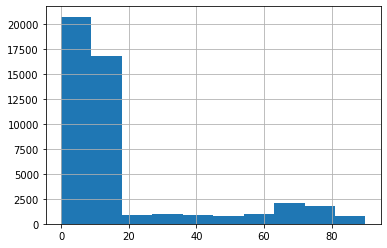

In [18]:
train.loc[index]['age'].hist()

Looking at these values it becomes clear that the majority of the duplicate entries are children, students or people without a job.

So it is realistic to think that two or more children live the same area, have the same age and the same income.
Which is safe to assume that it is a representation of the reality observed.

The same goes for unemployed people since we don't have past records we can't see if the duplicate entries are different people or not. 
Not only that but unemployed people are paid a similar wage for a period by state in the US (you can look [here](https://en.wikipedia.org/wiki/Unemployment_insurance_in_the_United_States) for more information about this topic), which makes even more likely to end up with the same amount for all features.


However, capital gains profits from the sale of assets held for more than a year, capital losses capital asset, such as an investment or real estate, decreases in value, wage per hour and weeks worked in year, are more relevant to identify potential duplicates candidates.

As it is very unlikely for people to have the same assets and profit/lose the same with them.

Additionally  we can see in the metadata that wage per hour with zero values can also include Armed Forces.

"How much does ... earn per hour?
Values: 0000 = Not in universe or children and Armed Forces
0001-9999 = Entry (2 implied decimal places)"


Considering all this:

It is fairly reasonable to assume that persons with non zero entries for capital gains, capital losses and dividends from stocks as well as people with neither 0 or 52 weeks (full year) worked are duplicate entries.
With that in mind we are going to proceed with that removal.

In [19]:
train.loc[index].loc[(train.loc[index].loc[:,'dividends from stocks'] > 0)
                    | (train.loc[index].loc[:,'capital gains'] > 0)
                    | (train.loc[index].loc[:,'capital losses'] > 0)
                    | ((train.loc[index].loc[:,'weeks worked in year'] > 0)
                    & (train.loc[index].loc[:,'weeks worked in year'] < 52))]

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enrolled in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,target
13643,90,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,4356,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
18763,63,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,94,- 50000.
19613,76,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,2062,0,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
20249,18,Not in universe,0,0,11th grade,0,High school,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Single,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,?,?,?,Not in universe under 1 year old,?,3,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,12,95,- 50000.
22009,44,Private,35,23,High school graduate,0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Adm support including clerical,White,All other,Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,40,95,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194436,70,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,2500,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
195416,20,Not in universe,0,0,Some college but no degree,0,College or university,Never married,Not in universe or childr

In [20]:
duplicate_index = train.loc[index].loc[(train.loc[index].loc[:,'dividends from stocks'] > 0)
                    | (train.loc[index].loc[:,'capital gains'] > 0)
                    | (train.loc[index].loc[:,'capital losses'] > 0)
                    | ((train.loc[index].loc[:,'weeks worked in year'] > 0)
                    & (train.loc[index].loc[:,'weeks worked in year'] < 52))].index.to_list()

In [21]:
train_nondups = train.loc[~train.index.isin(duplicate_index)]

### Missing Values

We can see above that there are some '?' across the dataframe, it seems that missing values have been replaced by it.

In [22]:
#checking for missing values in the dataframe
train_nondups.isna().sum().sum()

0

In [23]:
train_nondups['migration code-change in msa'].unique()

array([' ?', ' MSA to MSA', ' Nonmover', ' NonMSA to nonMSA',
       ' Not in universe', ' Not identifiable', ' Abroad to MSA',
       ' MSA to nonMSA', ' Abroad to nonMSA', ' NonMSA to MSA'],
      dtype=object)

In [24]:
#the characther used for missing values is ' ?' so let's see which columns have it missing.
train_nondups.isin([' ?']).any()

age                                          False
class of worker                              False
detailed industry recode                     False
detailed occupation recode                   False
education                                    False
wage per hour                                False
enrolled in edu inst last wk                 False
marital stat                                 False
major industry code                          False
major occupation code                        False
race                                         False
hispanic origin                              False
sex                                          False
member of a labor union                      False
reason for unemployment                      False
full or part time employment stat            False
capital gains                                False
capital losses                               False
dividends from stocks                        False
tax filer status               

In [25]:
#Constructing a datframe with the variable types and missing values per column
consistency = pd.DataFrame({'columns' : train_nondups.columns,
                    'type': train_nondups.dtypes,
                    'missing' : train_nondups.isin([' ?']).sum(),
                    'size' : train_nondups.shape[0],
                    'unique': train_nondups.nunique()})
consistency['percentage'] = round(consistency['missing'] / consistency['size'],2)
consistency

,columns,type,missing,size,unique,percentage
age,age,int64,0,199320,91,0.00
class of worker,class of worker,object,0,199320,9,0.00
detailed industry recode,detailed industry recode,int64,0,199320,52,0.00
detailed occupation recode,detailed occupation recode,int64,0,199320,47,0.00
education,education,object,0,199320,17,0.00
wage per hour,wage per hour,int64,0,199320,1240,0.00
enrolled in edu inst last wk,enrolled in edu inst last wk,object,0,199320,3,0.00
marital stat,marital stat,object,0,199320,7,0.00
major industry code,major industry code,object,0,199320,24,0.00
major occupation code,major occupation code,object,0,199320,15,0.00


The features: 
* migration code-change in msa,
* migration code-change in reg, 	
* migration code-move within reg,
* migration prev res in sunbelt.

Have 50% of the values missing, migration might be related to the income, however for now we'll proceed with removing these features.
A future test could be including these features while removing the rows (persons) with missing values.

In [26]:
columns_removing = ['migration code-change in msa',
    'migration code-change in reg',
    'migration code-move within reg',
    'migration prev res in sunbelt']

train_cleaning = train_nondups.loc[:,~train_nondups.columns.isin(columns_removing)]

There are still a couple of missing values in country of birth features and state of previous residence, since they are only 3% or less we'll proceed by removing those rows.

In [27]:
train_cleaning.loc[(train_cleaning.loc[:,'country of birth father'] ==' ?')
                  | (train_cleaning.loc[:,'country of birth mother'] ==' ?')
                  | (train_cleaning.loc[:,'country of birth self'] ==' ?')
                  | (train_cleaning.loc[:,'country of birth self'] ==' ?')
                  | (train_cleaning.loc[:,'state of previous residence'] ==' ?')]

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enrolled in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,live in this house 1 year ago,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,target
11,32,Not in universe,0,0,High school graduate,0,Not in universe,Never married,Not in universe or children,Not in universe,Black,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ never marr not in subfamily,Other relative of householder,Not in universe under 1 year old,0,Not in universe,?,?,?,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
26,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,Other,Central or South American,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Northeast,Michigan,Child <18 never marr not in subfamily,Child under 18 never married,No,0,Mother only present,?,?,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
34,81,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,991,0,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,Yes,0,Not in universe,?,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
54,42,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,Puerto Rican,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,Not in universe under 1 year old,0,Not in universe,?,?,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
70,27,Self-employed-not incorporated,33,16,Bachelors degree(BA AB BS),0,Not in universe,Never married,Retail trade,Sales,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Single,Northeast,?,Secondary individual,Nonrelative of householder,No,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199487,56,Private,31,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Utilities and sanitary services,Executive admin and managerial,White,All other,Male,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Not in universe under 1 year old,6,Not in universe,?,?,United-States,Native- Born in the United States,0,Not in universe,2,52,95,50000+.
199500,74,State government,44,42,7th and 8th grade,0,Not in universe,Widowed,Social services,Handlers equip cleaners etc,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,Yes,5,Not in universe,?,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199507,25,Self-employed-incorporated,33,16,Some college but no degree,0,Not in universe,Never married

In [28]:
missing_values_index = train_cleaning.loc[(train_cleaning.loc[:,'country of birth father'] ==' ?')
                  | (train_cleaning.loc[:,'country of birth mother'] ==' ?')
                  | (train_cleaning.loc[:,'country of birth self'] ==' ?')
                  | (train_cleaning.loc[:,'country of birth self'] ==' ?')
                  | (train_cleaning.loc[:,'state of previous residence'] ==' ?')].index.to_list()

In [29]:
train_cleaning = train_cleaning.loc[~train_cleaning.index.isin(missing_values_index)]

#verifying the removal of missing values
train_cleaning.isin([' ?']).sum().sum()

0

On a sidenote there's also a 'NA' value in the hispanic origin feature. But since 'NA' is actually labeled in the metadata we will treat it as a different category in the hispanic origin feature.

Before moving on let's transform our target category into 0s and 1s, so we can see its correlation to other features.

In [30]:
map_target = {' 50000+.':1,' - 50000.':0}
train_cleaning.target = train_cleaning.target.map(map_target)

### Feature distribution

### Continuous variables

Now that the duplicate and missing values were investigated and handled with we will take a look at the distribution of each feature and their correlation.

Starting with the continuous variables.

Note: as both detailed industry recode and detailed occupation recode are a subdivision of industry and occupation major codes, we will simply ignore them as they would imply having creating quite a few features at the one hot encoding stage. They will be removed further on.

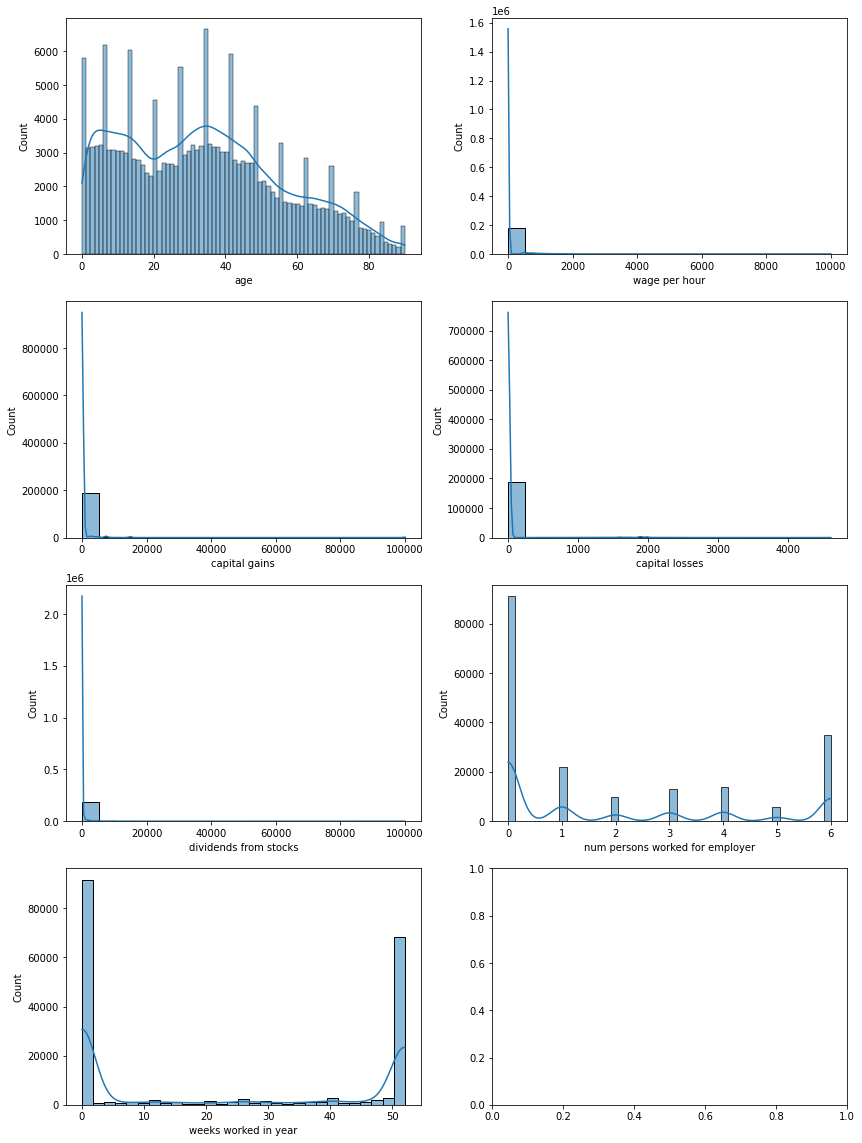

In [31]:
continuous = ['age','wage per hour', 'capital gains',
              'capital losses', 'dividends from stocks', 'num persons worked for employer', 
              'weeks worked in year']

fig, ax = plt.subplots(4, 2, figsize=(14, 20))
for variable, subplot in zip(continuous, ax.flatten()):
    sns.histplot(train_cleaning[variable], ax=subplot,kde=True)

Looking at the distributions it looks like some transformations seem fit for a couple of these features:
* capital losses, capital gains and dividends from stocks - can be divided into not having (0) and having(1)
* weeks worked in year - can be divided as not worked (0), worked the full year(2) and somewhere in between(1)

Since the goal is a classificator and not a regression model transforming features into binary features seems fit.
But we'll look into this later on. First let's see how the categorical features are distributed.

### Categorical Features

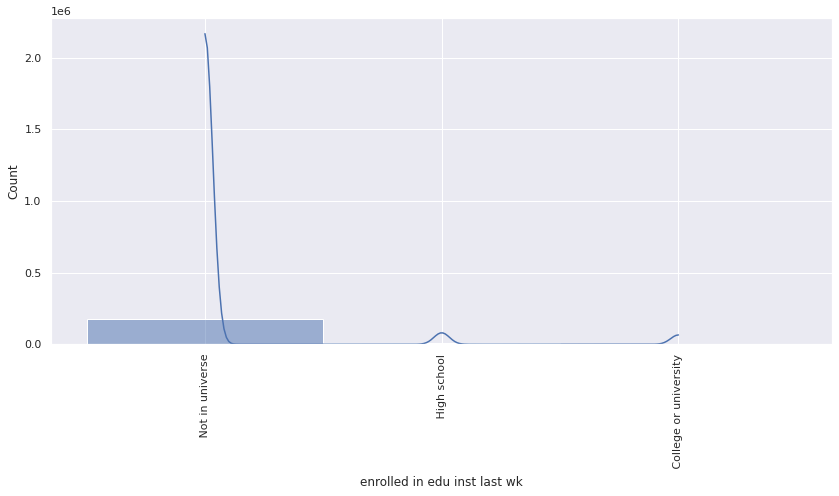

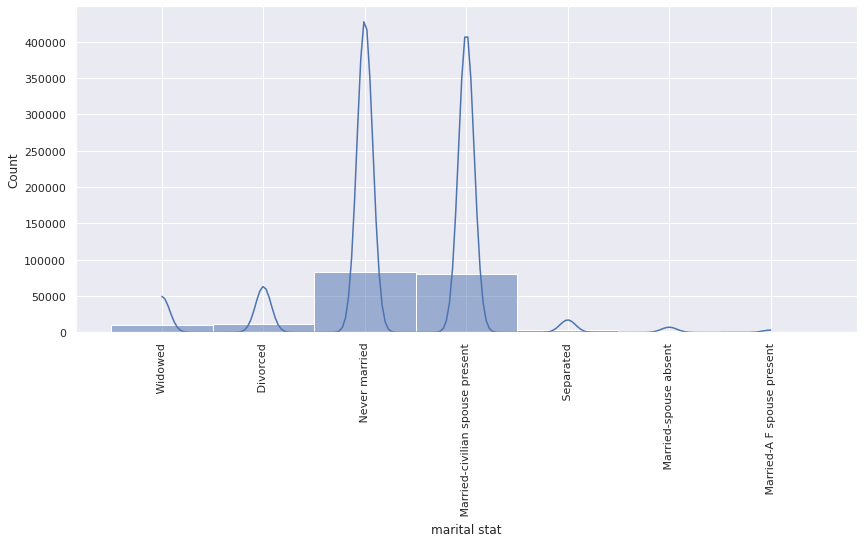

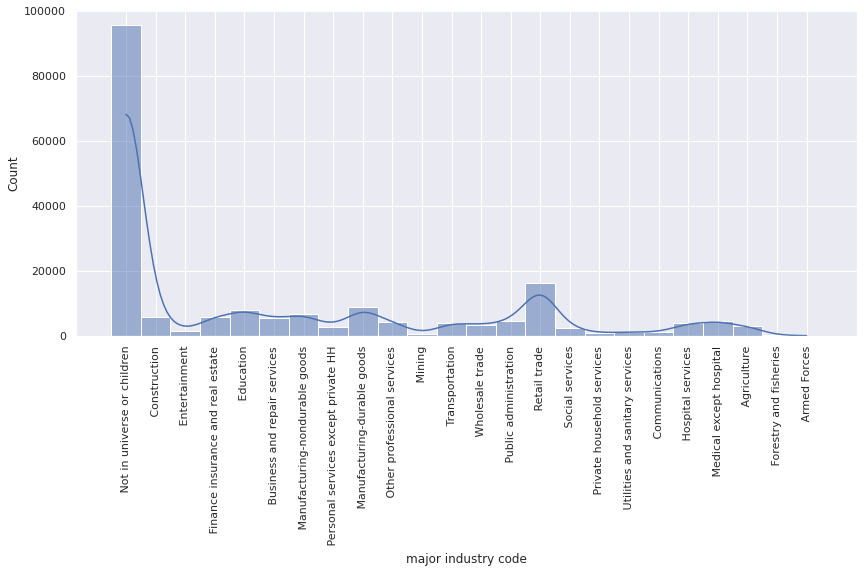

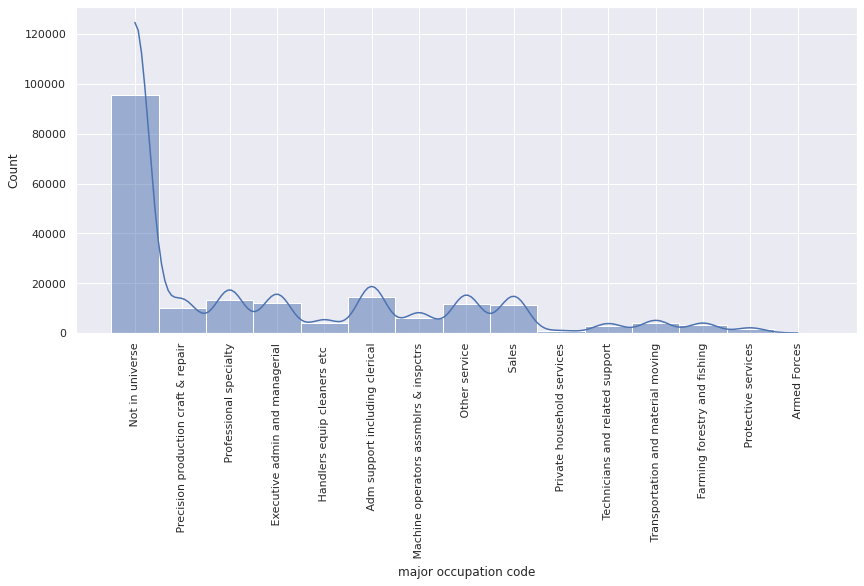

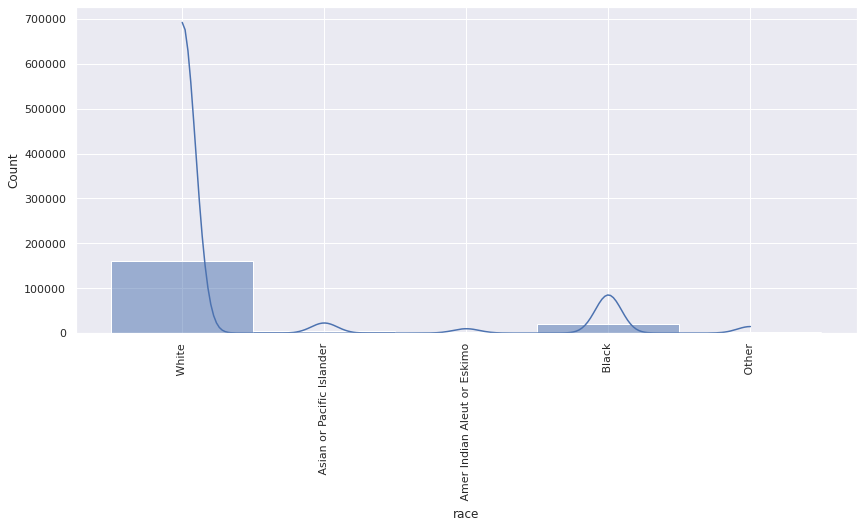

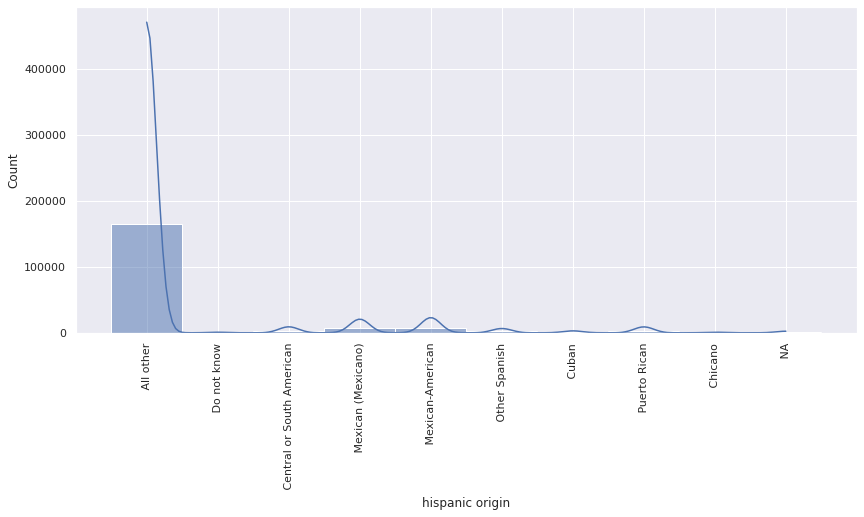

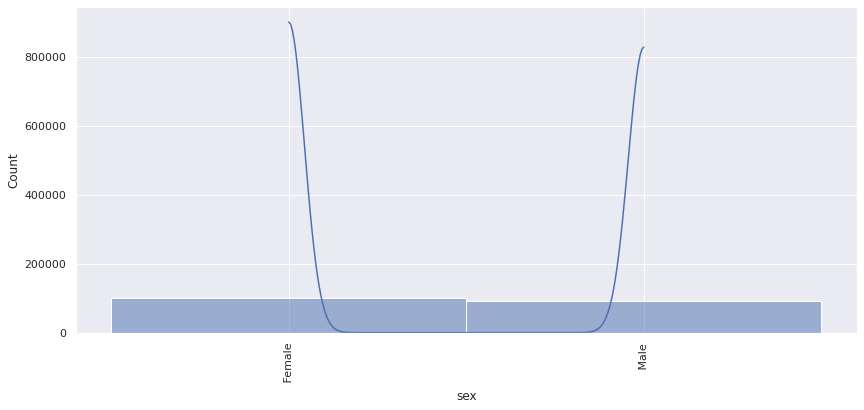

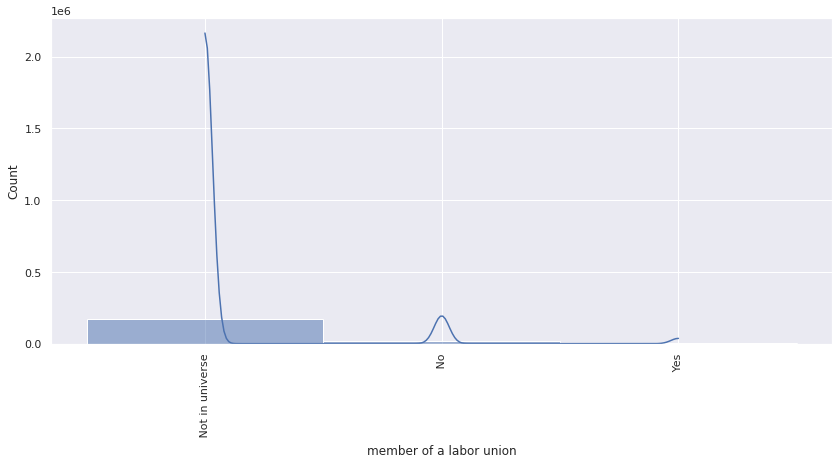

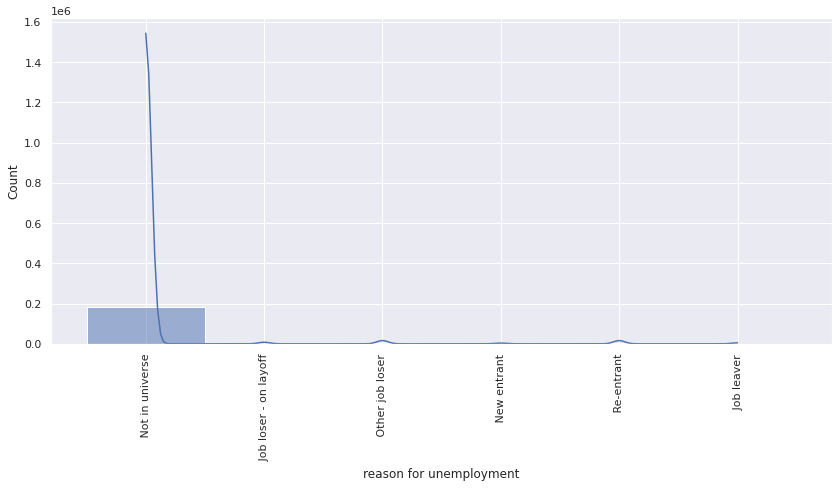

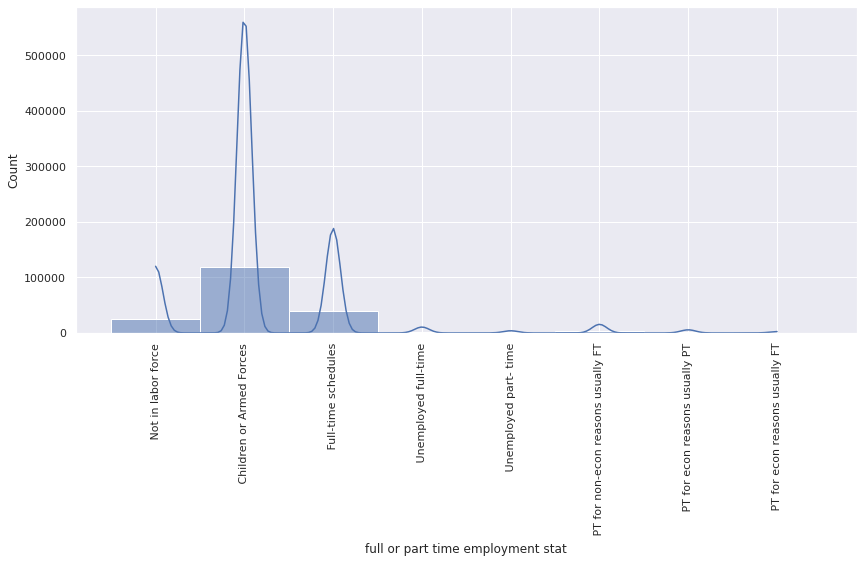

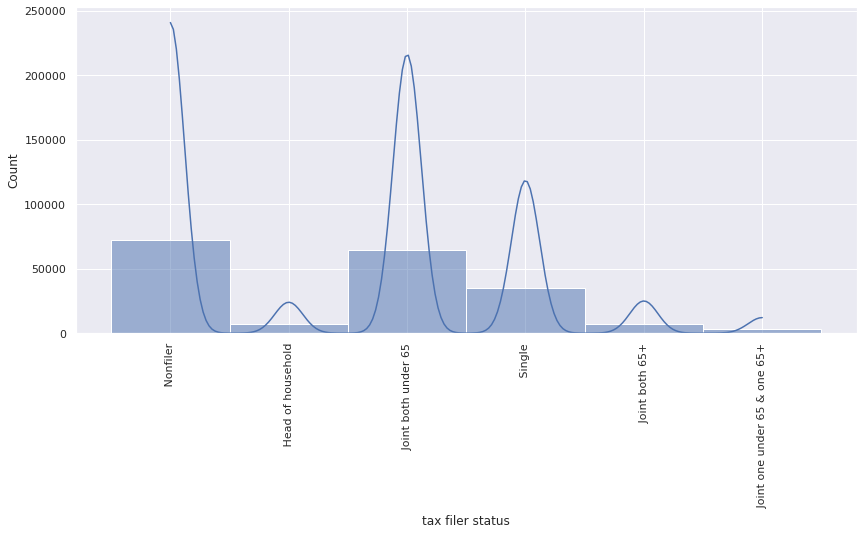

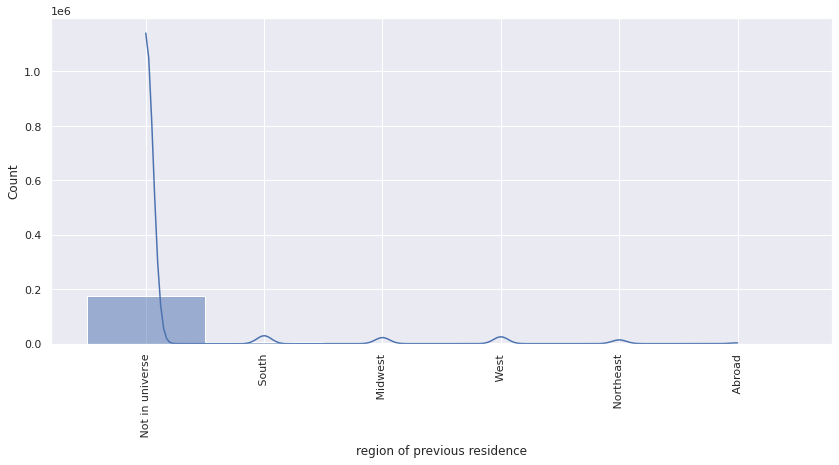

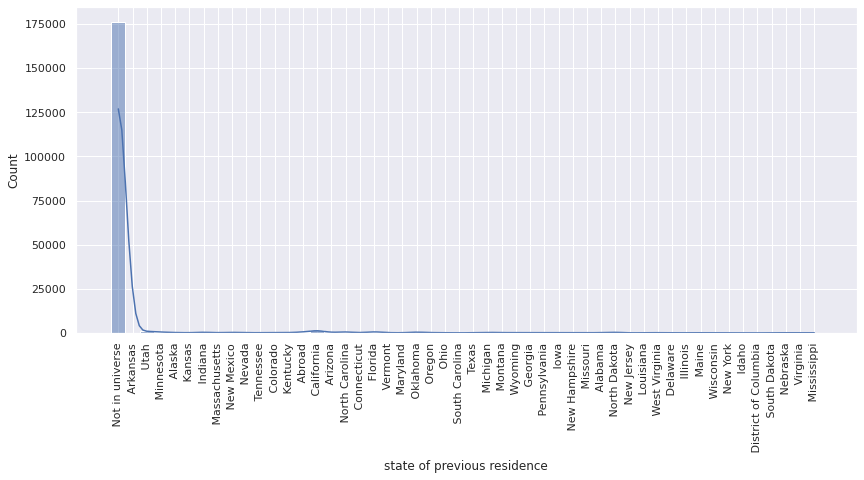

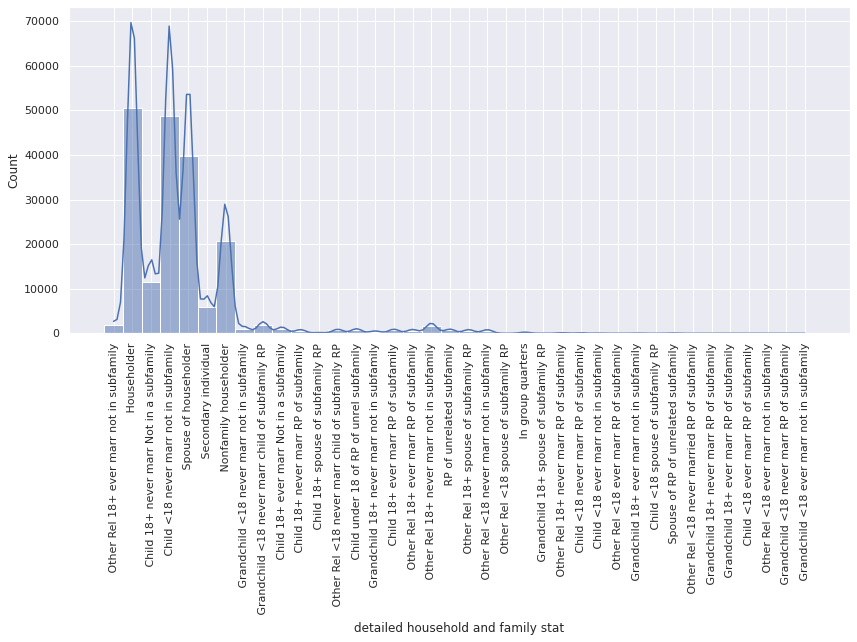

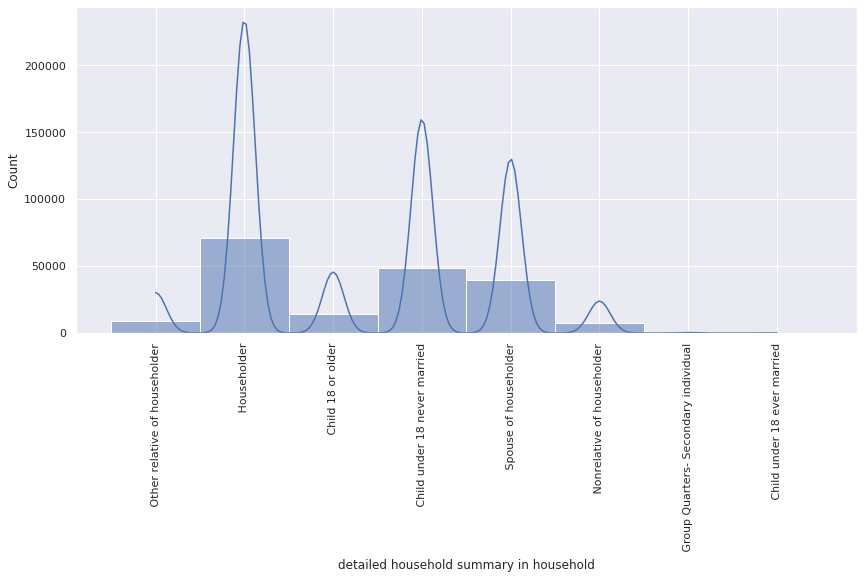

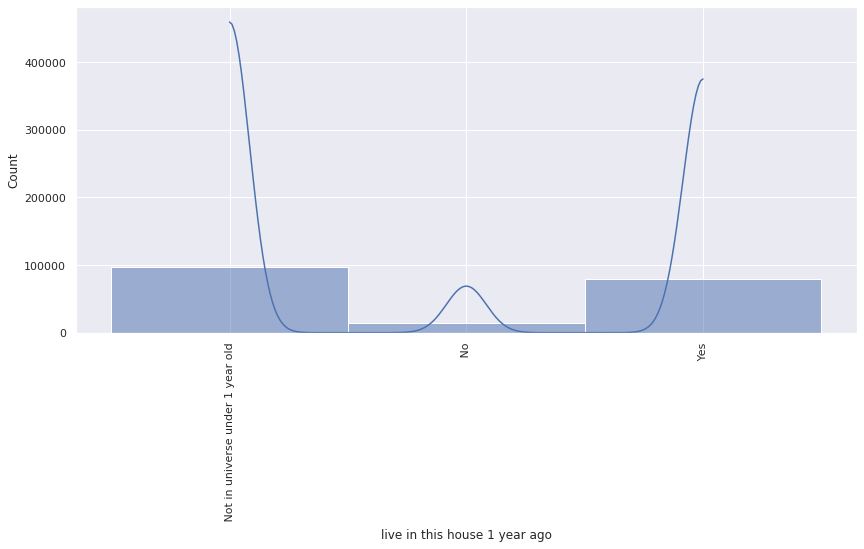

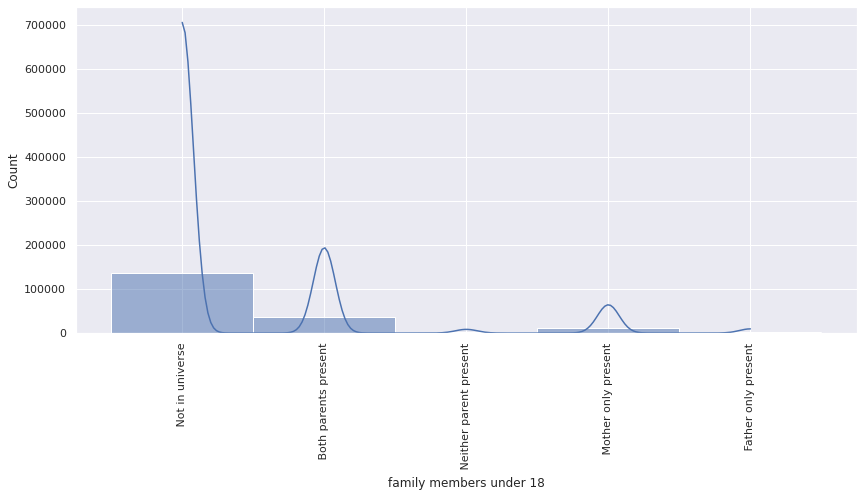

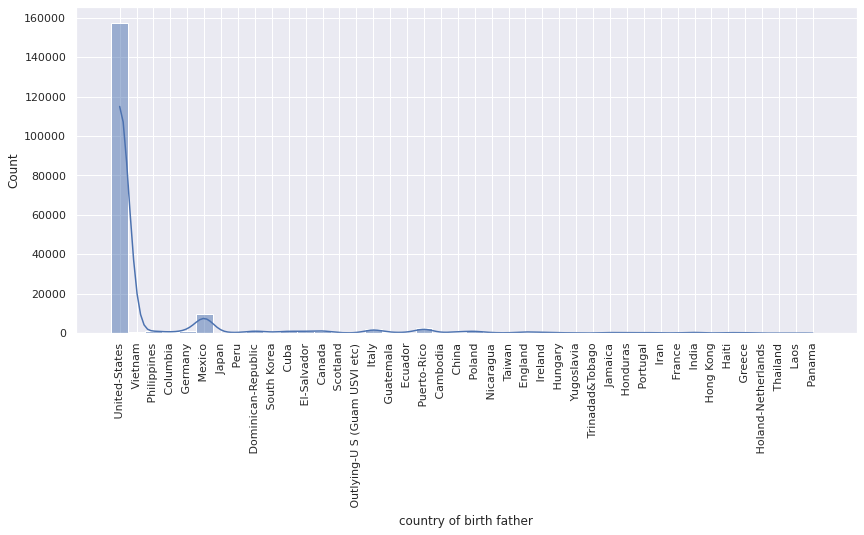

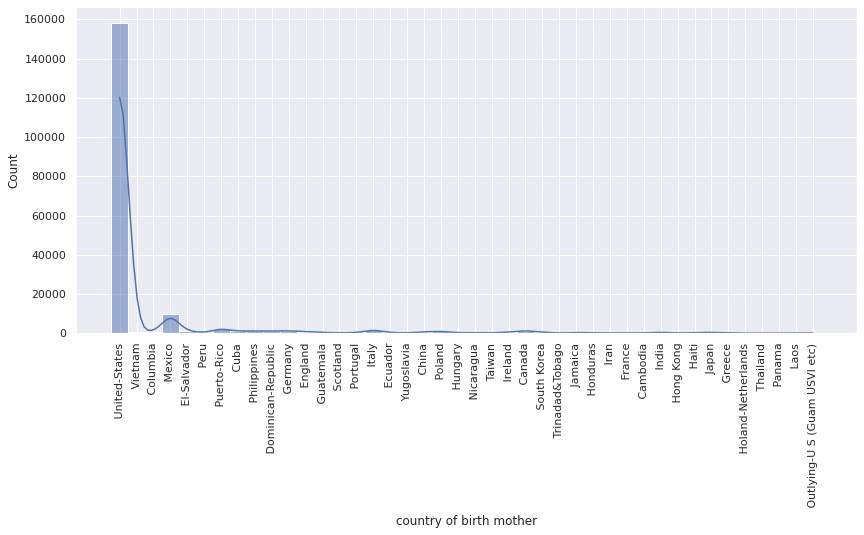

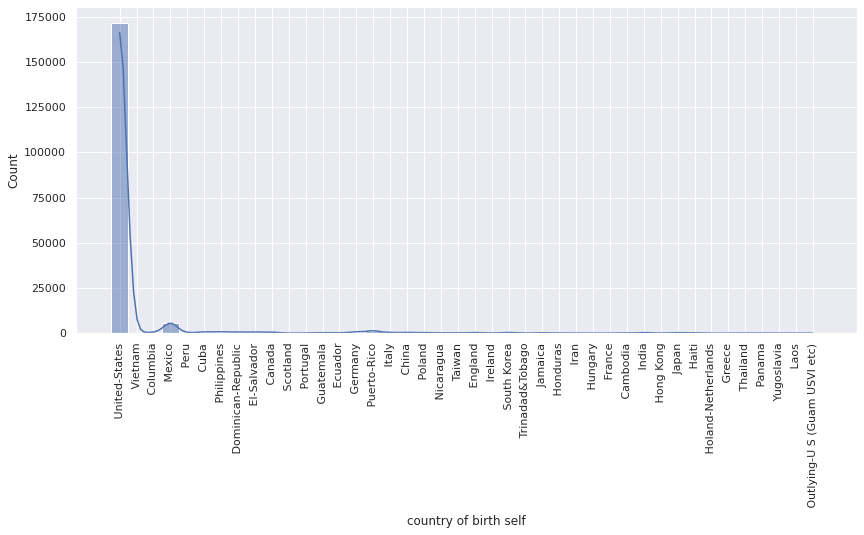

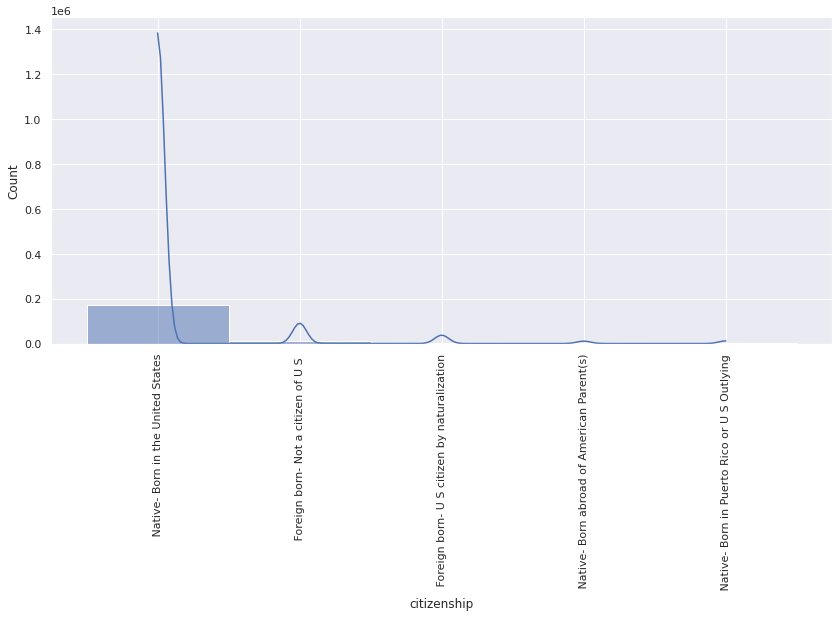

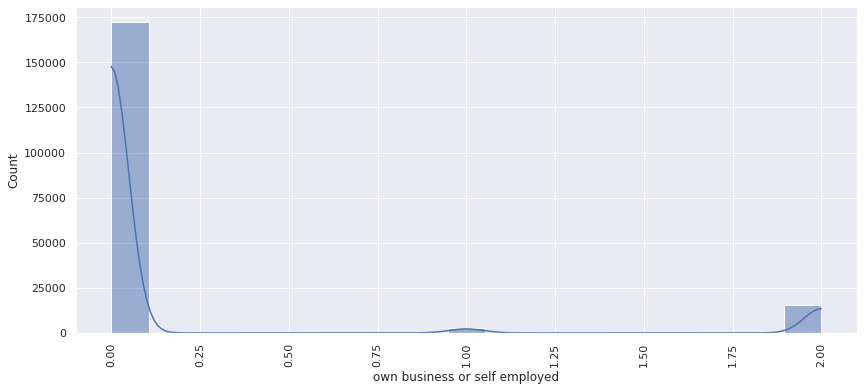

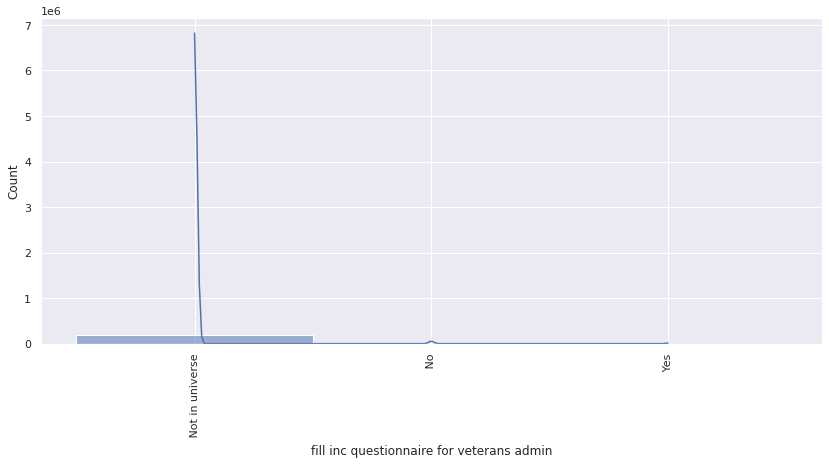

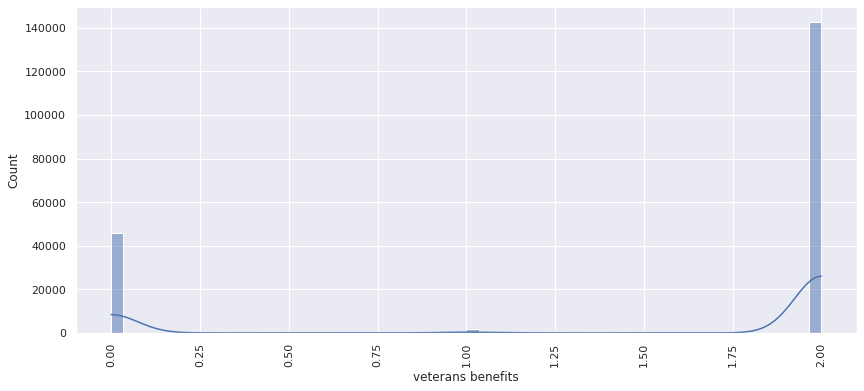

In [32]:
category = [
       'enrolled in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'tax filer status',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household',
       'live in this house 1 year ago', 
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'own business or self employed',
       'fill inc questionnaire for veterans admin', 'veterans benefits',
      ]
for col in category:
    sns.set(rc={'figure.figsize':(14,6)})
    plt.xticks(rotation=90)     
    sns.histplot(train_cleaning[col],kde=True)
    plt.show()

There's quite a lot to digest here:
* First, it becomes clear that there is a racial bias in the dataset.
* Secondly,it becomes clear that there are quite a few children and teenagers.
* Furthermore, there are a couple of features that can be divided as US and non-US, like all 3 citizenship features.
* Finally, there are a few imbalanced features.

Let's go through them one at a time.

While we look at race biases let's also take a closer look at how the balance is between genders.

In [33]:
train_cleaning['sex'].value_counts(normalize=True)

 Female    0.520979
 Male      0.479021
Name: sex, dtype: float64

In [34]:
train_cleaning['race'].value_counts(normalize=True)

 White                          0.840307
 Black                          0.103121
 Asian or Pacific Islander      0.027254
 Other                          0.017609
 Amer Indian Aleut or Eskimo    0.011709
Name: race, dtype: float64

In [35]:
train_cleaning['hispanic origin'].value_counts(normalize=True)

 All other                    0.862134
 Mexican-American             0.042136
 Mexican (Mexicano)           0.037876
 Central or South American    0.016637
 Puerto Rican                 0.016437
 Other Spanish                0.011883
 Cuban                        0.005374
 NA                           0.004371
 Chicano                      0.001581
 Do not know                  0.001571
Name: hispanic origin, dtype: float64

As we have seen in the distributions there are more women than men, but things are balanced.
However the race distribution it is very imbalanced.

So we need to reflect upon this, like what are the goals and purposes of this study, what it is expected to be the final product and how does a racial bias impact its outcome.

Also we need to compare it to the actual US race distribution. 
According to this [source](https://www.visualcapitalist.com/visualizing-u-s-population-by-race/) the data is indeed a bit off from reality, however we are comparing 2019 data to 1994/1995, so further investigation would need to be done.

Yet, the documentation states:
"The CPS sample is based on the civilian noninstitutional
population of the United States. The sample is located
in approximately 826 sample areas comprising 1,328
counties and independent cities with coverage in every
State and in the District of Columbia."

So we will proceed assuming that this is the reality at that point, while keeping the alert on for any side effect race bias might have.

Moving on to children:

The legal working age varies from state to state in the USA, it can go as low as 14 with hour restrictions.
However as seen [here](https://worldpopulationreview.com/state-rankings/minimum-working-age-by-state) at 18 a person can work anywhere.
So let's consider that threshold.

In [36]:
(train_cleaning['age'] < 18).sum(), round((train_cleaning['age'] < 18).sum()/train_cleaning.shape[0]*100,2)

(54197, 28.47)

Nearly 30% of the dataset is composed by people who can't work.
As the goal of this study is to identify characteristics that are associated with a person making more or less than $50k/year, if a person can't legally work the outcome is already known (with a few exceptions of course).

With that in mind all entries with age under 18 will be removed.

Now, let's take a closer look at the imbalanced features seen above.

In [37]:
train_cleaning['fill inc questionnaire for veterans admin'].value_counts(normalize=True)

 Not in universe    0.990066
 No                 0.007959
 Yes                0.001975
Name: fill inc questionnaire for veterans admin, dtype: float64

In [38]:
train_cleaning['member of a labor union'].value_counts(normalize=True)

 Not in universe    0.903582
 No                 0.081026
 Yes                0.015392
Name: member of a labor union, dtype: float64

Both the 'veteran benefits' and 'the own business or self employed' features are classified the following way:

niu = "Not in Use"
Values: 0 = niu
1 = yes
2 = no

In [39]:
train_cleaning['own business or self employed'].value_counts(normalize=True)

0    0.904449
2    0.081971
1    0.013580
Name: own business or self employed, dtype: float64

In [40]:
train_cleaning['veterans benefits'].value_counts(normalize=True)

2    0.748754
0    0.241312
1    0.009934
Name: veterans benefits, dtype: float64

The 'region of previous residence' and 'state of previous residence' essentially tells us if a person has moved or not, so the latter is a sub information of the first. Let's check if any of them has information the other doesn't have before deciding what to do.

In [41]:
train_cleaning['region of previous residence'].value_counts()

 Not in universe    175852
 South                4521
 West                 3919
 Midwest              3476
 Northeast            2148
 Abroad                443
Name: region of previous residence, dtype: int64

In [42]:
train_cleaning['state of previous residence'].value_counts()

 Not in universe         175852
 California                1620
 Utah                      1048
 Florida                    810
 North Carolina             752
 Oklahoma                   610
 Abroad                     578
 Minnesota                  546
 Indiana                    524
 North Dakota               492
 New Mexico                 443
 Michigan                   418
 Alaska                     283
 Arizona                    240
 Kentucky                   238
 Wyoming                    236
 New Hampshire              233
 Colorado                   233
 West Virginia              227
 Montana                    226
 Oregon                     225
 Georgia                    221
 Alabama                    214
 Texas                      207
 Arkansas                   204
 Ohio                       198
 Tennessee                  198
 Mississippi                193
 Louisiana                  192
 New York                   192
 Pennsylvania               189
 Iowa   

In [43]:
#Not in universe has the same count, let's double check by seeing if they are the same rows
train_cleaning.loc[(train_cleaning.loc[:,'region of previous residence']==' Not in universe')
                  &(train_cleaning.loc[:,'state of previous residence']==' Not in universe')].shape[0]


175852

In [44]:
train_cleaning['family members under 18'].value_counts()

 Not in universe           136842
 Both parents present       37604
 Mother only present        12453
 Father only present         1841
 Neither parent present      1619
Name: family members under 18, dtype: int64

Some of them seem candidates to be removed like the 'own business or self employed' since most values are not in use.

And one could argue that 'fill inc questionnaire for veterans admin' is related to possible future income and the 'veteran benefits' already provided that info.
With that assumption 'fill inc questionnaire for veterans admin' will be removed whereas the remaining features will be kept for correlation analysis.

Furthermore, the 'detailed household and family stat' is also a subdivision of the 'detailed household summary in household' feature, so we will proceed with only the summary feature for the same reason stated for the industry and work code features.
The same principle is going to be applied to 'region of previous residence' and 'state of previous residence', so we'll be keeping the region feature only.

There is only a single in the 'family members under 18' feature since we reduce the population to 18+ so we'll drop the feature as well.

The year column also needs to be dropped since presumably we want to use this predictive model in the future and those future years won’t be included in the dataset.

Before doing the actual correlation we will drop the columns stated above and apply the age restriction.

In [45]:
drop_columns = ['detailed industry recode','detailed occupation recode',
                'fill inc questionnaire for veterans admin', 'detailed household and family stat',
                'state of previous residence','family members under 18','year']

train_cleaning.drop(columns=drop_columns, inplace=True)

In [46]:
train_cleaning = train_cleaning.loc[train.loc[:,'age']>=18]

Before applying the transformations let's take a first look at the correlation matrix.

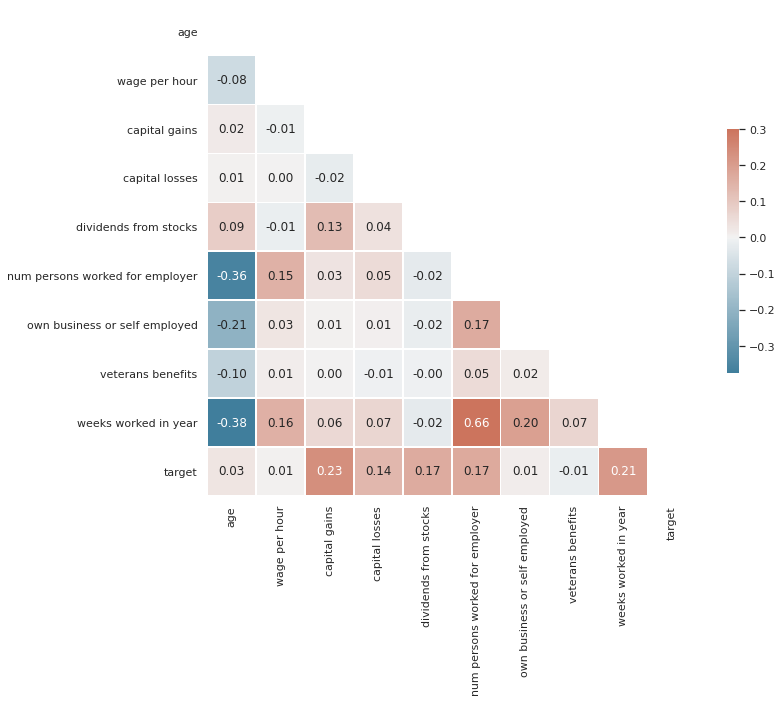

In [47]:
sns.set_style("white")

# Compute the correlation matrix
corr = train_cleaning.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Weeks worked in year, capital gains, capital losses, dividends from stocks and, num persons worked for employer are the most correlated features with our target variable.
And if we exclude the positive correlation of capital losses to the higher income, all of them seem naturally related: 

If we have extra income (capital gains, dividends from stocks) we are likely to earn more.

If we work more weeks we are likely to earn more.

And if there are more people working for you, you are likely to have a bigger company and thus earn more.

## Feature engineering

But let's recategorize these features according to the distribution and double check the differences in correlation.

In [48]:
#there are no values between 0 and 0.00001, this would need to be revisited to improve, 
#but it will be adopted as a temporary solution    
bins = [0, 0.000001,np.inf]
labels = [0,1]

train_cleaning['capital gains'] = pd.cut(train_cleaning['capital gains'], bins,labels=labels, include_lowest=True)
train_cleaning['capital losses']= pd.cut(train_cleaning['capital losses'], bins,labels=labels, include_lowest=True)
train_cleaning['dividends from stocks']= pd.cut(train_cleaning['dividends from stocks'], bins,labels=labels, include_lowest=True)
train_cleaning['capital gains'] = train_cleaning['capital gains'].cat.codes
train_cleaning['capital losses'] = train_cleaning['capital losses'].cat.codes
train_cleaning['dividends from stocks'] = train_cleaning['dividends from stocks'].cat.codes

In [49]:
bins = [0, 0.000001,51.99999999, 52]

#we are going to assume the discrete variable as there is an actual time difference between 0 and 52weeks.
labels = [0,1,2]

train_cleaning['weeks worked in year'] = pd.cut(train_cleaning['weeks worked in year'], bins,labels=labels, include_lowest=True)
train_cleaning['weeks worked in year'] = train_cleaning['weeks worked in year'].cat.codes

In [50]:
(train_cleaning['wage per hour']>0).sum(), round((train_cleaning['wage per hour']>0).sum()/train_cleaning.shape[0]*100,2)

(10557, 7.75)

There are few values in the wage per hour feature, so we are going to transform this feature into:
* 0 - not declared wage per hour
* 1 - declared wage per hour

In [51]:
bins = [0, 0.000001,np.inf]
labels = [0,1]
train_cleaning['wage per hour'] = pd.cut(train_cleaning['wage per hour'], bins,labels=labels, include_lowest=True)
train_cleaning['wage per hour'] = train_cleaning['wage per hour'].cat.codes

Taking another look at the correlation matrix after the transformations.

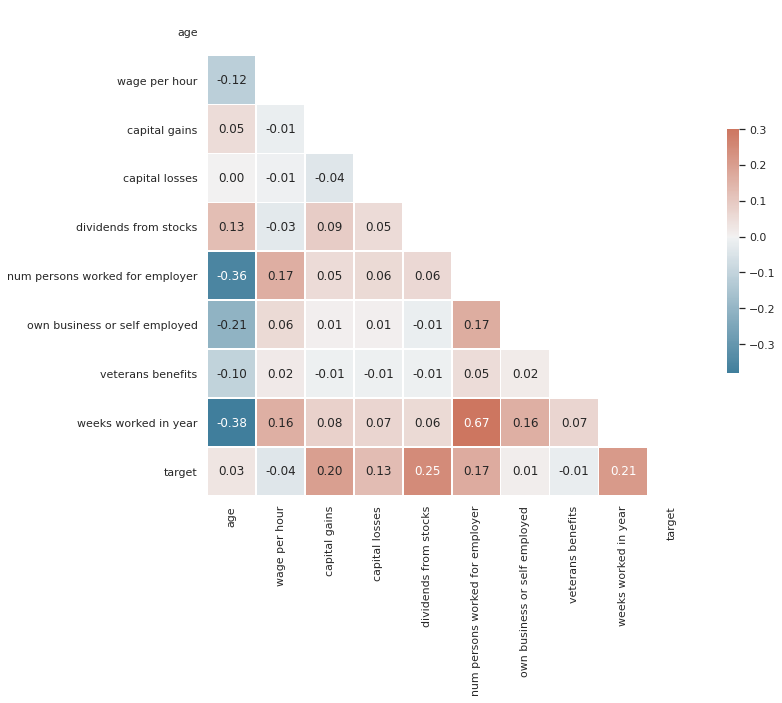

In [52]:
sns.set_style("white")

# Compute the correlation matrix
corr = train_cleaning.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

The correlation values have varied a little but the highest correlation features have been kept.

Now we'll one hot encode the categorical type variables, with a few exceptions that will be handled differently.

In [53]:
dummy_cols = ['class of worker', 'education','enrolled in edu inst last wk', 
              'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat',
              'tax filer status',
       'region of previous residence',
       'detailed household summary in household',
            'live in this house 1 year ago', 'num persons worked for employer',
             'own business or self employed', 'veterans benefits'
       ]


def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            #for each cat add dummy var, drop original column
            df = pd.concat([df.drop(columns=col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df;

train_cleaning = create_dummy_df(train_cleaning,dummy_cols, False) 

We are now going to convert the country features into:
1 - United States
0 - Every other country

In [54]:
list_of_keys = train_cleaning['country of birth father'].unique()
list_of_values = np.zeros(len(train_cleaning['country of birth father'].unique()))
map_country_father = dict(zip(list_of_keys, list_of_values))
map_country_father[' United-States'] = 1
train_cleaning['country of birth father'] = train_cleaning['country of birth father'].map(map_country_father)
train_cleaning['country of birth father'] = train_cleaning['country of birth father'].astype(int)
train_cleaning['country of birth father'].value_counts()

1    111877
0     24285
Name: country of birth father, dtype: int64

In [55]:
list_of_keys = train_cleaning['country of birth mother'].unique()
list_of_values = np.zeros(len(train_cleaning['country of birth mother'].unique()))
map_country_mother = dict(zip(list_of_keys, list_of_values))
map_country_mother[' United-States'] = 1
train_cleaning['country of birth mother'] = train_cleaning['country of birth mother'].map(map_country_mother)
train_cleaning['country of birth mother'] = train_cleaning['country of birth mother'].astype(int)
train_cleaning['country of birth mother'].value_counts()

1    112406
0     23756
Name: country of birth mother, dtype: int64

In [56]:
list_of_keys = train_cleaning['country of birth self'].unique()
list_of_values = np.zeros(len(train_cleaning['country of birth self'].unique()))
map_country_self = dict(zip(list_of_keys, list_of_values))
map_country_self[' United-States'] = 1
train_cleaning['country of birth self'] = train_cleaning['country of birth self'].map(map_country_self)
train_cleaning['country of birth self'] = train_cleaning['country of birth self'].astype(int)
train_cleaning['country of birth self'].value_counts()

1    119847
0     16315
Name: country of birth self, dtype: int64

In [57]:
train_cleaning['citizenship'].unique()

array([' Native- Born in the United States',
       ' Foreign born- Not a citizen of U S ',
       ' Foreign born- U S citizen by naturalization',
       ' Native- Born abroad of American Parent(s)',
       ' Native- Born in Puerto Rico or U S Outlying'], dtype=object)

As for citizenship we'll convert the natives into 1s and foreign into 0s.

In [58]:
map_citenzship ={' Native- Born in the United States':1,
       ' Foreign born- Not a citizen of U S ':0,
       ' Foreign born- U S citizen by naturalization':0,
       ' Native- Born abroad of American Parent(s)':1,
       ' Native- Born in Puerto Rico or U S Outlying':1}
train_cleaning['citizenship'] = train_cleaning['citizenship'].map(map_citenzship)
train_cleaning['citizenship'] = train_cleaning['citizenship'].astype(int)
train_cleaning['citizenship'].value_counts()

1    122125
0     14037
Name: citizenship, dtype: int64

Now we can look at the correlation values for all features.

In [59]:
pd.set_option("display.max_rows", len(train_cleaning.corr()['target']))
train_cleaning.corr()['target'].sort_values(ascending=False)

target                                                                           1.000000
dividends from stocks                                                            0.247571
major occupation code_ Executive admin and managerial                            0.220098
weeks worked in year                                                             0.212100
capital gains                                                                    0.199816
sex_ Male                                                                        0.194702
major occupation code_ Professional specialty                                    0.186475
education_ Prof school degree (MD DDS DVM LLB JD)                                0.180888
education_ Masters degree(MA MS MEng MEd MSW MBA)                                0.177130
education_ Bachelors degree(BA AB BS)                                            0.160271
detailed household summary in household_ Householder                             0.158078
tax filer 

In [60]:
pd.set_option("max_columns", train_cleaning.shape[1])
train_cleaning

,age,wage per hour,capital gains,capital losses,dividends from stocks,country of birth father,country of birth mother,country of birth self,citizenship,weeks worked in year,target,class of worker_ Local government,class of worker_ Never worked,class of worker_ Not in universe,class of worker_ Private,class of worker_ Self-employed-incorporated,class of worker_ Self-employed-not incorporated,class of worker_ State government,class of worker_ Without pay,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Less than 1st grade,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,enrolled in edu inst last wk_ High school,enrolled in edu inst last wk_ Not in universe,marital stat_ Married-A F spouse present,marital stat_ Married-civilian spouse present,marital stat_ Married-spouse absent,marital stat_ Never married,marital stat_ Separated,marital stat_ Widowed,major industry code_ Armed Forces,major industry code_ Business and repair services,major industry code_ Communications,major industry code_ Construction,major industry code_ Education,major industry code_ Entertainment,major industry code_ Finance insurance and real estate,major industry code_ Forestry and fisheries,major industry code_ Hospital services,major industry code_ Manufacturing-durable goods,major industry code_ Manufacturing-nondurable goods,major industry code_ Medical except hospital,major industry code_ Mining,major industry code_ Not in universe or children,major industry code_ Other professional services,major industry code_ Personal services except private HH,major industry code_ Private household services,major industry code_ Public administration,major industry code_ Retail trade,major industry code_ Social services,major industry code_ Transportation,major industry code_ Utilities and sanitary services,major industry code_ Wholesale trade,major occupation code_ Armed Forces,major occupation code_ Executive admin and managerial,major occupation code_ Farming forestry and fishing,major occupation code_ Handlers equip cleaners etc,major occupation code_ Machine operators assmblrs & inspctrs,major occupation code_ Not in universe,major occupation code_ Other service,major occupation code_ Precision production craft & repair,major occupation code_ Private household services,major occupation code_ Professional specialty,major occupation code_ Protective services,major occupation code_ Sales,major occupation code_ Technicians and related support,major occupation code_ Transportation and material moving,race_ Asian or Pacific Islander,race_ Black,race_ Other,race_ White,hispanic origin_ Central or South American,hispanic origin_ Chicano,hispanic origin_ Cuban,hispanic origin_ Do not know,hispanic origin_ Mexican (Mexicano),hispanic origin_ Mexican-American,hispanic origin_ NA,hispanic origin_ Other Spanish,hispanic origin_ Puerto Rican,sex_ Male,member of a labor union_ Not in universe,member of a labor union_ Yes,reason for unemployment_ Job loser - on layoff,reason for unemployment_ New entrant,reason for unemployment_ Not in universe,reason for unemployment_ Other job loser,reason for unemployment_ Re-entrant,full or part time employment stat_ Full-time schedules,full or part time employment stat_ Not in labor force,full or part time employment stat_ PT for econ reasons usually FT,full or part time employment stat_ PT for econ reasons usually PT,full or part time employment stat_ PT for non-econ reasons usually FT,full or part time employment stat_ Unemployed full-time,full or part time employment stat_ Unemployed part- time,tax filer status_ Joint both 6

## Train/Test distribution

Let's run a Kolmogorov-Smirnov test to verify the train and test samples come from the same distribution.

In [61]:
test = pd.read_csv(test_path,names=column_names)

from scipy import stats
for col in train.columns:
    print(col + str(stats.ks_2samp(train[col], test[col])))

ageKstestResult(statistic=0.003118756572067949, pvalue=0.5361165873575839)
class of workerKstestResult(statistic=0.0017619850070028642, pvalue=0.9857601663724586)
detailed industry recodeKstestResult(statistic=0.0031082341424191196, pvalue=0.5405146578014349)
detailed occupation recodeKstestResult(statistic=0.0020187941950580157, pvalue=0.9486868168881143)
educationKstestResult(statistic=0.0042192991102528166, pvalue=0.1866541941020038)
wage per hourKstestResult(statistic=0.0010075649778784612, pvalue=0.9999998778481417)
enrolled in edu inst last wkKstestResult(statistic=0.00048082912143328216, pvalue=1.0)
marital statKstestResult(statistic=0.0010170854890730746, pvalue=0.9999998303288006)
major industry codeKstestResult(statistic=0.0026958106354479927, pvalue=0.7180966245481062)
major occupation codeKstestResult(statistic=0.002369189740883515, pvalue=0.8485069996026067)
raceKstestResult(statistic=0.0008369354969459866, pvalue=0.9999999999572715)
hispanic originKstestResult(statistic=0

All p-values are above 10% so we cannot reject the null hypothesis (the sets come from the same distribution).

This concludes the exploratory data analysis. 
Please move on to the data preparation notebook to see the next step.